In [170]:
import PIL
from PIL import Image, ImageDraw
import colorsys
import random
import math
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from Modules import shapes
from Modules import colors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
#we will focus on drawing the images first. 

"""
Each image will have at least one of and up to all of the following: 

1. A triangle
2. A circle
3. A square
"""

'\nEach image will have at least one of and up to all of the following: \n\n1. A triangle\n2. A circle\n3. A square\n'

In [174]:
color_picker = colors.ColorPicker(colors.KNOWN_COLORS)

In [175]:
color_picker(4)

[0, 120, 60, 90]

In [3]:
"""
This is how to generate an image with a background color
"""
canvas_size = (224, 224)
canvas_color = (228, 150, 150)

canvas = Image.new(mode='RGB',
                   size=canvas_size,
                   color=canvas_color,
                  )

In [4]:
#canvas.show()

In [5]:
draw = ImageDraw.Draw(canvas)

In [6]:
"""
Here we will draw a triangle
"""
# coordinates = [
#     (12, 72),
#     (40, 37),
#     (100, 96)
# ]
# color = (132, 25, 68)
# draw.polygon(xy=coordinates,
#              fill=color)

triangle = shapes.Triangle()(image_shape=canvas_size, color=(132, 25, 68))
draw.polygon(xy=triangle.parameterization,
             fill=triangle.color)

In [7]:
#canvas.show()

In [8]:
"""
Here we draw a circle

draw.ellipse()

PARAMETERS:
xy – Two points to define the bounding box. Sequence of either [(x0, y0), (x1, y1)] or [x0, y0, x1, y1], where x1 >= x0 and y1 >= y0.

outline – Color to use for the outline.

fill – Color to use for the fill.

width –

The line width, in pixels.
"""


# def generate_bounding_box(starting_point, size):
#     """Given the x0, y0, generate the x1, y1 where x1 > x0 and y1 > y0"""
#     other_point = tuple(point + size for point in starting_point)
#     parameterization = [starting_point, other_point]
#     return parameterization

# starting_point = (200, 200)
# color = (177, 200, 37)
# draw.ellipse(xy=generate_bounding_box(starting_point, 50),
#             fill=color)

specifications = {
    'min_size': 25,
    'max_size': 66
}

circle = shapes.Circle(specifications=specifications)(color=(177, 200, 37), image_shape=canvas_size)
draw.ellipse(xy=circle.parameterization,
             fill=circle.color)

In [9]:
#canvas.show()

In [10]:
"""
Now lets make the square
"""

specifications = {
    'min_size': 30,
    'max_size': 82
}
# starting_point = (170, 100)
fillcolor = (69, 69, 69)
# draw.rectangle(xy=generate_bounding_box(starting_point, 75),
#                fill=fillcolor)

square = shapes.Square(specifications=specifications)(color=fillcolor,image_shape=canvas_size)
draw.rectangle(xy=square.parameterization,
               fill=square.color)

In [11]:
canvas.show()

## Exploring color generation

In [37]:
"""
We will use hls coordinates and convert to rgb for the image making
"""

HSL_PARAMETERS = {'hue':360,
                  'lightness':100,
                  'saturation':100,}

def normalize_hls(coordinates: tuple):
    """normalizes the hls coordinates"""
    hue, lightness, saturation = coordinates
    return (hue / HSL_PARAMETERS['hue'],
            lightness / HSL_PARAMETERS['lightness'],
            saturation / HSL_PARAMETERS['saturation'])

In [38]:
def rgb_scaler(value: float):
    rounding_safe_scalar = min(1.0, value)
    if rounding_safe_scalar == 1.0:
        return 255
    else:
        return value * 256

def to_rgb(normed_hls: tuple):
    """produces an rgb tuple"""
    return tuple( math.floor(rgb_scaler(value)) for value in normed_hls)

In [39]:
def native_hls_to_rgb(unnormed_coord: tuple):
    """changes an unnormed coord in hls to an unnormed rgb coord"""
    return to_rgb(colorsys.hls_to_rgb(*normalize_hls(unnormed_coord)))

In [42]:
example_hls = (0, 0, 0)
print(native_hls_to_rgb(example_hls))

(0, 0, 0)


In [124]:
accepted_colors = np.arange(0, 275, 30)

In [132]:
accepted_colors

array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270])

In [133]:
#accepted_colors = accepted_colors[:-3]

In [134]:
accepted_colors

array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270])

In [135]:
example_saturation = 41
example_lightness = 67

In [168]:
number = accepted_colors[4]
print(number)
example_hls = (number, example_lightness, example_saturation) #accepted_colors[]
example_rgb = native_hls_to_rgb(example_hls)

120


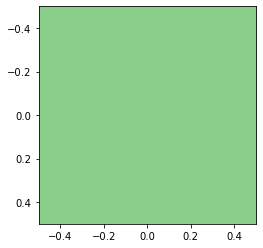

In [169]:
plt.imshow([[tuple( thing / 255 for thing in example_rgb)]])

In [ ]:
accepted_colors = [0, 30, 60, 90, 120, 210, 240, 270]